In [1]:
import pandas as pd
df = pd.read_csv('train_data.csv')
df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,ALLEN PHILLIP K,4175000,2869717,-3081055,0,phillip.allen@enron.com,1729541,13868,2195,47,...,304805,152,0,126027,-126027,201955,1407,2902,4484442,1729541
1,BADUM JAMES P,0,178980,0,0,0,257817,3486,0,0,...,0,0,0,0,0,0,0,0,182466,257817
2,BAN0TINE JAMES M,0,0,-5104,0,james.ban0tine@enron.com,4046157,56301,29,39,...,0,864523,0,1757552,-560222,477,465,566,916197,5243487
3,BAXTER JOHN C,1200000,1295738,-1386055,0,0,6680544,11200,0,0,...,1586055,2660303,0,3942714,0,267102,0,0,5634343,10623258
4,BAZELIDES PHILIP J,0,684694,0,0,0,1599641,0,0,0,...,93750,874,0,0,0,80818,0,0,860136,1599641


In [2]:
features =list(df.columns)
features.remove('name')
features.remove('email_address')
features.remove('poi')
#features.remove('director_fees')
#features.remove('restricted_stock_deferred')
print(features)
#features=['exercised_stock_options','total_stock_value','other','expenses','total_payments','salary','restricted_stock']
#features=['exercised_stock_options','total_stock_value']
#特徵欄位
dataset_train=pd.read_csv('train_data.csv')
dataset_test=pd.read_csv('test_features.csv')

['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


In [3]:
from sklearn.ensemble import RandomForestClassifier  #
cf = RandomForestClassifier(250) 

cf = RandomForestClassifier(n_estimators=250,min_samples_split=30)
cf.fit(dataset_train[features], dataset_train['poi'])

RandomForestClassifier(min_samples_split=30, n_estimators=250)

In [4]:
import pandas as pd
prediction = cf.predict(dataset_test[features])
print(prediction)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
importance = pd.Series(cf.feature_importances_, index=features).sort_values(ascending=False)
importance


exercised_stock_options      0.183852
total_stock_value            0.140473
salary                       0.107845
bonus                        0.090824
other                        0.087498
expenses                     0.086893
restricted_stock             0.057614
deferred_income              0.042319
total_payments               0.039997
shared_receipt_with_poi      0.036974
long_term_incentive          0.034991
from_poi_to_this_person      0.032917
from_this_person_to_poi      0.028744
to_messages                  0.016430
loan_advances                0.008687
from_messages                0.003007
deferral_payments            0.000936
restricted_stock_deferred    0.000000
director_fees                0.000000
dtype: float64

<AxesSubplot:>

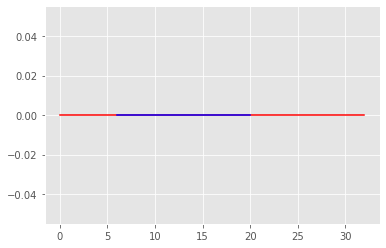

In [6]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
returns1 = dataset_test['poi'][prediction == False]
returns2 = dataset_test['poi'][prediction == True]
pd.Series(returns1).cumprod().plot(color='red')
pd.Series(returns2).cumprod().plot(color='blue')
#pd.Series(seasonal_returns2, index=dates).cumprod().plot(color='blue')

In [7]:
#https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/361723/
#https://blog.gcp.expert/supervised-learning-classification-regression/
#https://www.itread01.com/content/1549571767.html
#https://www.itread01.com/content/1547100921.html
#https://kknews.cc/zh-tw/tech/gvage8.html
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(cf,dataset_test[features], dataset_test['poi'], cv = 10, scoring='precision') 
scores = cross_val_score(cf,dataset_test[features], dataset_test['poi']) 
print(scores.mean())

0.6666666666666666


In [8]:
#SVM

In [9]:
import pandas as pd
df = pd.read_csv('train_data.csv')
df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,ALLEN PHILLIP K,4175000,2869717,-3081055,0,phillip.allen@enron.com,1729541,13868,2195,47,...,304805,152,0,126027,-126027,201955,1407,2902,4484442,1729541
1,BADUM JAMES P,0,178980,0,0,0,257817,3486,0,0,...,0,0,0,0,0,0,0,0,182466,257817
2,BAN0TINE JAMES M,0,0,-5104,0,james.ban0tine@enron.com,4046157,56301,29,39,...,0,864523,0,1757552,-560222,477,465,566,916197,5243487
3,BAXTER JOHN C,1200000,1295738,-1386055,0,0,6680544,11200,0,0,...,1586055,2660303,0,3942714,0,267102,0,0,5634343,10623258
4,BAZELIDES PHILIP J,0,684694,0,0,0,1599641,0,0,0,...,93750,874,0,0,0,80818,0,0,860136,1599641


In [10]:
features =list(df.columns)
features.remove('name')
features.remove('email_address')
features.remove('poi')
print(features)
#features=['exercised_stock_options','total_stock_value','other','expenses','total_payments','salary','restricted_stock']
#features=['exercised_stock_options','total_stock_value']
#特徵欄位
dataset_train=pd.read_csv('train_data.csv')
dataset_test=pd.read_csv('test_features.csv')

['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


In [11]:
from sklearn.svm import SVC  #
cf = SVC() 
cf.fit(dataset_train[features], dataset_train['poi'])
prediction = cf.predict(dataset_train[features])

In [12]:
import pandas as pd
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [13]:
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(cf,dataset_test[features], dataset_test['poi'], cv = 10, scoring='precision') 
scores = cross_val_score(cf,dataset_test[features], dataset_test['poi']) 
print(scores.mean())

0.6666666666666666
